# RNN Test

In [1]:
WORK_FOLDER='../'

In [2]:
import sys
sys.path.append(WORK_FOLDER)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from utils.helper import loadCovidData, plotPlaces
from utils.RNN import RNN
%matplotlib inline

Using TensorFlow backend.


In [4]:
df = loadCovidData(prefix=WORK_FOLDER)

In [5]:
df_total = df.groupby(by='fecha_informe').sum().reset_index()
unique_place = 'Comunidad de Madrid'
df_total['municipio_distrito'] = df_total.apply(lambda x: unique_place, axis=1)

In [6]:
def getPlaceSerie(df, place):
    _, df_inc = plotPlaces(df, np.array([place]), agg_factor=1, plot=False)
    serie = df_inc['Contagios diarios'].to_numpy()
    return serie

In [7]:
serie = getPlaceSerie(df,'Getafe')

<Figure size 1440x504 with 0 Axes>

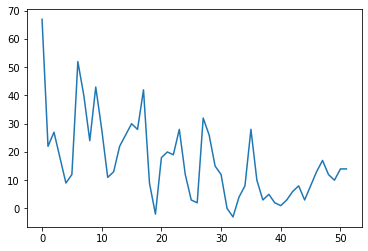

In [8]:
plt.plot(serie)

In [9]:
rnn = RNN(data=serie, window_size=7, lstm_units=8, epochs=150)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
history, score = rnn.train(verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 36 samples, validate on 9 samples
Epoch 1/150
 - 3s - loss: 0.0732 - val_loss: 0.1018
Epoch 2/150
 - 0s - loss: 0.0646 - val_loss: 0.0891
Epoch 3/150
 - 0s - loss: 0.0575 - val_loss: 0.0778
Epoch 4/150
 - 0s - loss: 0.0518 - val_loss: 0.0683
Epoch 5/150
 - 0s - loss: 0.0475 - val_loss: 0.0604
Epoch 6/150
 - 0s - loss: 0.0443 - val_loss: 0.0543
Epoch 7/150
 - 0s - loss: 0.0420 - val_loss: 0.0494
Epoch 8/150
 - 0s - loss: 0.0402 - val_loss: 0.0457
Epoch 9/150
 - 0s - loss: 0.0390 - val_loss: 0.0428
Epoch 10/150
 - 0s - loss: 0.0379 - val_loss: 0.0405
Epoch 11/150
 - 0s - loss: 0.0371 - val_loss: 0.0386
Epoch 12/150
 - 0s - loss: 0.0364 - val_loss: 0.0371
Epoch 13/150
 - 0s - loss: 0.0358 - val_loss: 0.0359
Epoch 14/150
 - 0s - loss: 0.0352 - val_loss: 0.0348
Epoch 15/150
 - 0s - loss: 0.0347 - val_loss: 0.0339
Epoch 16/150
 - 0s - loss: 0.0342 - val_loss: 0.0331
Epoch 17/150
 - 0s - loss: 0.0337 - val_loss: 0.0324
Epoch 18/150
 - 0

 - 0s - loss: 0.0138 - val_loss: 0.0137
Epoch 150/150
 - 0s - loss: 0.0138 - val_loss: 0.0137
9/9 [==============================] - 0s 1ms/step


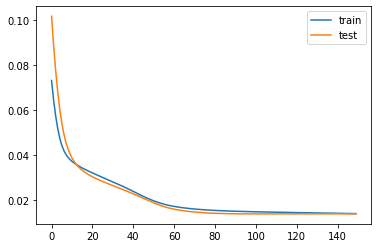

In [11]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [12]:
print('score: ',score)

score:  0.01368545823627048


In [13]:
y, y_pred = rnn.getAllPredictions()

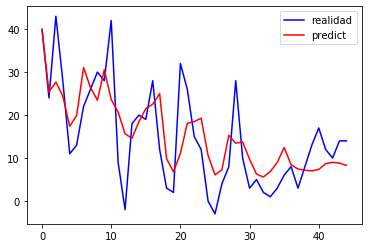

In [20]:
plt.plot(y,'b',label='realidad')
plt.plot(y_pred,'r',label='predict')
plt.legend()

In [ ]:
preds = rnn.predict(40)

In [ ]:
plt.plot(preds)